In [1]:
print("problema de creativitate")

problema de creativitate


In [3]:
import pandas as pd

from nltk.corpus import stopwords
import re
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt

In [4]:
# importam ce avem nevoie

In [5]:
df = pd.read_csv('results.csv', delimiter=',')
tags= df['tags'].values


In [6]:
# VREAI SA MA FOLOSESC DE TAGURI SA VAD CARE S CELE MAI UZUALE
# cum arata tags in general

In [7]:
print(tags)
l=""
for i in tags:
    print(i)
    l=l+"|"+str(i)


['android|url|android-intent|intentfilter|launch' 'java|eclipse'
 'winforms|deployment|clickonce' 'ios4|uikit' 'c#|delegates|action'
 'java|web-services|security' 'java|html|applet|overlay|z-index'
 'javascript|syntax-highlighting' 'xsd|guid|xsd.exe' 'perforce'
 '.net|winforms|animation' 'c#|linq|distinct' 'python|python-2.7'
 'c#|winforms|model-view-controller|mvp|projects'
 'c#|.net|winforms|generics|user-controls' 'url|pdf|hyperlink|bookmarks'
 'linux|svn|checkout' '.net|windows|serial-port|lockup'
 'ruby-on-rails|ruby|security|anonymous-users' 'php|regex|preg-match'
 'c#|debugging|windbg' 'c#|.net|winforms|.net-2.0'
 'c++|arduino|virtual-functions|firmware' 'factor-lang' 'svn'
 'php|javascript|jquery|html|css' 'postgresql'
 'objective-c|database|cocoa' 'c#|sharepoint|http|upload'
 'xml|delphi|serialization|xml-serialization|rtti'
 'javascript|jquery|firefox|firefox-addon'
 'python|functional-programming|closures' 'c#|f#|2d|physics'
 'c#|c#-3.0|automatic-properties' 'java|cartesian-

In [9]:
#stergem unde avem nan si separam prin | ca asa este am observat in csv
l=l.replace("|nan","")

# de asemenea tagurile sunt separate prin | daca exista mai multe la o postare
l=l.replace("|"," ")
# de exemplu avem sql-2015 si deoarece folosim count vectorizer acesta o sa ni l sparga in 2 ceea ce nu ne dorim asa
# dupa analiza csv -nu influenteaza informatia transmisa si ne putem da seama ca este vorba de sql2015 si fara liniuta
#asa ca am ales sa fac asa
l=l.replace("-","")

# print(len(l))


In [10]:
#mai jos am luat in considerare faptul ca poate unele taguri sunt stop words si nu ar fi relevante
#in cazul nostru nu sunt am verificat cu len dimensiunea inainte si dupa extragere

In [11]:
# print(len(l))
pattern = re.compile(r'\b(' + r'|'.join(stopwords.words('english')) + r')\b\s*')
text = pattern.sub('', l)
#in cazul noastru nu sunt stop words se poate observa din len dar ar fi bine sa verificam totusi acest aspect
# print(len(text))


In [14]:
#il facem lista deoarece avem nevoie de e in formatul acesta

list=[text]
print(list)

[' android url androidintent intentfilter launch java eclipse winforms deployment clickonce ios4 uikit c# delegates action java webservices security java html applet overlay zindex javascript syntaxhighlighting xsd guid xsd.exe perforce .net winforms animation c# linq distinct python python2.7 c# winforms modelviewcontroller mvp projects c# .net winforms generics usercontrols url pdf hyperlink bookmarks linux svn checkout .net windows serialport lockup rubyonrails ruby security anonymoususers php regex pregmatch c# debugging windbg c# .net winforms .net2.0 c++ arduino virtualfunctions firmware factorlang svn php javascript jquery html css postgresql objectivec database cocoa c# sharepoint http upload xml delphi serialization xmlserialization rtti javascript jquery firefox firefoxaddon python functionalprogramming closures c# f# 2d physics c# c#3.0 automaticproperties java cartesianproduct java zeropad documentation uml agile c# datetime null c++ c pointers declaration java mime iphone 

In [15]:
#in continuare dorim sa aplicam count vectorizer pentru am avea sub forma de dictionar rezultatul
vectorizer = CountVectorizer()

# tokenize and build vocab
vectorizer.fit(list)
# summarize
print(vectorizer.vocabulary_)


dict=vectorizer.vocabulary_


{'android': 17, 'url': 738, 'androidintent': 24, 'intentfilter': 336, 'launch': 392, 'java': 359, 'eclipse': 201, 'winforms': 792, 'deployment': 167, 'clickonce': 102, 'ios4': 345, 'uikit': 725, 'delegates': 164, 'action': 2, 'webservices': 781, 'security': 621, 'html': 304, 'applet': 41, 'overlay': 514, 'zindex': 814, 'javascript': 364, 'syntaxhighlighting': 686, 'xsd': 808, 'guid': 287, 'exe': 219, 'perforce': 530, 'net': 471, 'animation': 32, 'linq': 400, 'distinct': 176, 'python': 572, 'python2': 573, 'modelviewcontroller': 447, 'mvp': 464, 'projects': 563, 'generics': 267, 'usercontrols': 741, 'pdf': 528, 'hyperlink': 313, 'bookmarks': 73, 'linux': 403, 'svn': 679, 'checkout': 96, 'windows': 786, 'serialport': 628, 'lockup': 408, 'rubyonrails': 606, 'ruby': 605, 'anonymoususers': 34, 'php': 537, 'regex': 587, 'pregmatch': 553, 'debugging': 161, 'windbg': 785, 'net2': 472, 'arduino': 43, 'virtualfunctions': 761, 'firmware': 235, 'factorlang': 222, 'jquery': 377, 'css': 145, 'postgr

In [16]:
tags=[]
apps=[]
for tag,app in dict.items():
    tags.append(tag)
    apps.append(app)

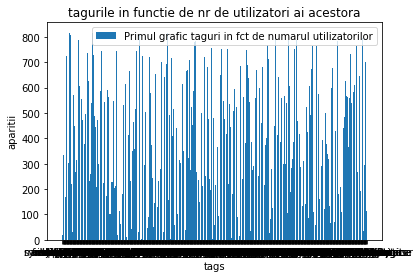

In [20]:
plt.bar(tags,apps, label="Primul grafic taguri in fct de numarul utilizatorilor")
plt.legend()
plt.xlabel('tags')
plt.ylabel('aparitii')
plt.title('tagurile in functie de nr de utilizatori ai acestora')
plt.show()

In [17]:
#avem nevoie de format de lista pentru a putea sa le facem grafic
#sortam in ordinea aparitilor descrescator

In [21]:
a = sorted(dict.items(), key=lambda x: x[1],reverse=True)
#a o sa fie sub forma de lista de seturi
print(a)

[('zoom', 816), ('zones', 815), ('zindex', 814), ('zeropad', 813), ('zeromq', 812), ('zendframework', 811), ('xslt', 810), ('xslcompiledtransform', 809), ('xsd', 808), ('xmlserialization', 807), ('xmlparsing', 806), ('xml', 805), ('xen', 804), ('xcode', 803), ('xaml', 802), ('wysiwyg', 801), ('wss', 800), ('wpf', 799), ('wordpresstheming', 798), ('wordpressplugin', 797), ('wordpress', 796), ('wordbreaker', 795), ('wix', 794), ('winrtxaml', 793), ('winforms', 792), ('windowsvista', 791), ('windowsservices', 790), ('windowsphone8', 789), ('windowsinstaller', 788), ('windows8', 787), ('windows', 786), ('windbg', 785), ('winapi', 784), ('whitespace', 783), ('website', 782), ('webservices', 781), ('webserver', 780), ('webrequest', 779), ('webmethods', 778), ('webframeworks', 777), ('webapplications', 776), ('wcfbinding', 775), ('wcf', 774), ('watch', 773), ('vmware', 772), ('visualstudioaddins', 771), ('visualstudio2015', 770), ('visualstudio2012', 769), ('visualstudio2010', 768), ('visuals

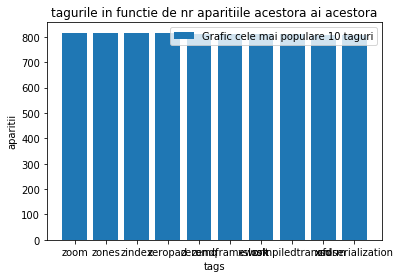

In [23]:
tags=[]
apps=[]
for tag,app in a:
        tags.append(tag)
        apps.append(app)

plt.bar(tags[:10],apps[:10], label="Grafic cele mai populare 10 taguri")
plt.legend()
plt.xlabel('tags')
plt.ylabel('aparitii')
plt.title('tagurile in functie de nr aparitiile acestora ai acestora')
plt.show()


In [24]:
#acum vrem sa aflam care s top cele mai vizionate postari 


In [26]:
titles=df['title'].values
views= df['view_count'].values
bodies=df['body'].values

In [30]:
vizualizari=[]
# am ales sa luam pentru atetea body-uri pentru ca unele postari nu au titlu si unele poaye nu au vizualizari dar tot exista
for i in range(len(bodies)):
    d1={
        #aici poate avea o multime de campuri dar eu le am ales pe acestea ca sa mi fie mai usor sa verific
        'view_count':views[i],
        'title': titles[i]
    }
    vizualizari.append(d1)

print(vizualizari)


[{'view_count': 91060.0, 'title': 'Android Respond To URL in Intent'}, {'view_count': 4272.0, 'title': "Eclipse -- Progress windows don't show up any more"}, {'view_count': 2534.0, 'title': "What's the best way to create ClickOnce deployments"}, {'view_count': 2837.0, 'title': 'iOS: how to get image dimensions without opening it'}, {'view_count': 12377.0, 'title': 'action delegate with zero parameters'}, {'view_count': 7568.0, 'title': 'JAX-WS authentication against a database'}, {'view_count': 12116.0, 'title': 'Java Applet z-index on Safari and beyond'}, {'view_count': 1284.0, 'title': 'How Code Color is Set in StackOverflow?'}, {'view_count': 20808.0, 'title': 'What is the correct way of using the Guid type in a XSD file?'}, {'view_count': 5995.0, 'title': 'How can I grab my local changelist and send it to someone else in Perforce?'}, {'view_count': 14991.0, 'title': 'Simple animation in WinForms'}, {'view_count': 10620.0, 'title': 'Why is there no Linq method to return distinct val

In [33]:
print("Lista sortata dupa vizualizari : ")
print(sorted(vizualizari, key = lambda i: i['view_count'],reverse=True))



Lista sortata dupa vizualizari : 
[{'view_count': 1403837.0, 'title': 'What is the correct JSON content type?'}, {'view_count': 353039.0, 'title': 'How can I pad an integers with zeros on the left?'}, {'view_count': 262443.0, 'title': 'How can I pass command-line arguments to a Perl program?'}, {'view_count': 222979.0, 'title': 'Could not find default endpoint element'}, {'view_count': 218943.0, 'title': 'DateTime null value'}, {'view_count': 212683.0, 'title': "Getting A File's Mime Type In Java"}, {'view_count': 210630.0, 'title': 'how to get GET and POST variables with JQuery?'}, {'view_count': 183054.0, 'title': 'Recommendations of Python REST (web services) framework?'}, {'view_count': 156421.0, 'title': 'How to set HttpResponse timeout for Android in Java'}, {'view_count': 152573.0, 'title': 'ORA-01031: insufficient privileges when selecting view'}, {'view_count': 104922.0, 'title': 'How to make an embedded video not autoplay'}, {'view_count': 96463.0, 'title': 'How do I get the 

In [35]:
print('Top 5 postari cu cele mai multe vizualizari:')

Top 5 postari cu cele mai multe vizualizari:


In [37]:

vizualizari=sorted(vizualizari, key = lambda i: i['view_count'],reverse=True)
print(vizualizari[:5])

[{'view_count': 1403837.0, 'title': 'What is the correct JSON content type?'}, {'view_count': 353039.0, 'title': 'How can I pad an integers with zeros on the left?'}, {'view_count': 262443.0, 'title': 'How can I pass command-line arguments to a Perl program?'}, {'view_count': 222979.0, 'title': 'Could not find default endpoint element'}, {'view_count': 218943.0, 'title': 'DateTime null value'}]


In [38]:
# FACEM DIN NOU LISTE PENTRU A FACE NISTE GRAFICE
titles2=[]
views2=[]
for i in range(len(vizualizari)):
        titles2.append(vizualizari[i]['title'])
        views2.append(vizualizari[i]['view_count'])


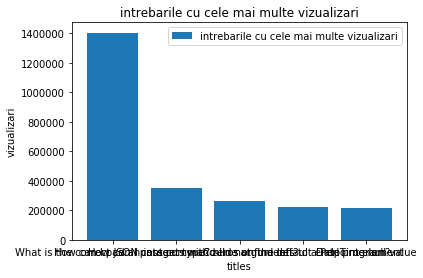

In [39]:
plt.bar(titles2[:5],views2[:5], label="intrebarile cu cele mai multe vizualizari")
plt.legend()
plt.xlabel('titles')
plt.ylabel('vizualizari')
plt.title('intrebarile cu cele mai multe vizualizari')
plt.show()
